In [5]:
import pandas as pd
import sklearn as skl
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = []
file_paths = ['/Users/pranavvenkata/Downloads/archive/Lillehammer 1994 Olympics Nations Medals.csv',
    '/Users/pranavvenkata/Downloads/archive/Atlanta 1996 Olympics Nations Medals.csv',
    '/Users/pranavvenkata/Downloads/archive/Nagano 1998 Olympics Nations Medals.csv',
    '/Users/pranavvenkata/Downloads/archive/Sydney 2000 Olympics Nations Medals.csv',
    '/Users/pranavvenkata/Downloads/archive/SaltLakeCity 2002 Olympics Nations Medals.csv',
    '/Users/pranavvenkata/Downloads/archive/Athens 2004 Olympics Nations Medals.csv',
    '/Users/pranavvenkata/Downloads/archive/Torino 2006 Olympics Nations Medals.csv',
    '/Users/pranavvenkata/Downloads/archive/Vancouver 2010 Olympics Nations Medals.csv',
    '/Users/pranavvenkata/Downloads/archive/London 2012 Olympics Nations Medals.csv',
    '/Users/pranavvenkata/Downloads/archive/Sochi 2014 Olympics Nations Medals.csv',
    '/Users/pranavvenkata/Downloads/archive/Rio 2016 Olympics Nations Medals.csv',
    '/Users/pranavvenkata/Downloads/archive/PyeongChang 2018 Olympics Nations Medals.csv',
    '/Users/pranavvenkata/Downloads/archive/Tokyo 2020 Olympics Nations Medals.csv',
    '/Users/pranavvenkata/Downloads/archive/Beijing 2022 Olympics Nations Medals.csv',
    '/Users/pranavvenkata/Downloads/archive/Paris 2024 Olympics Nations Medals.csv']
years = [1994, 1996, 1998, 2000, 2002, 2004, 2006, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2024]
for file_path, year in zip(file_paths, years):
    table = pd.read_csv(file_path)
    table['Year'] = year
    df.append(table)
combined_df = pd.concat(df)
combined_df = combined_df.sort_values(by=['NOC'])
combined_df.reset_index(drop=True, inplace=True)
df1 = []
noc_codes = ['USA', 'CAN', 'GER', 'FRA', 'ITA', 'UKR', 'AUS', 'CHN', 'JPN', 'KOR', 'SWE', 'NOR', 'FIN', 'SUI', 'AUT', 'NED', 'POL', 'CZE', 'HUN', 'BUL', 'ROU', 'ESP', 'BEL', 'DEN', 'NZE']
for noc in noc_codes:
    country_row_df = combined_df[combined_df['NOC'] == noc]
    df1.append(country_row_df)
df2 = pd.concat(df1)

In [7]:
predictors = ["Year", "Total"]
target = "Total"
teams = df2[["NOC", "Gold", "Silver", "Bronze", "Total", "Year"]]
train = teams[teams["Year"] < 2020].copy()
test = teams[teams["Year"] >= 2020].copy()
reg = RandomForestClassifier()
reg.fit(train[predictors], train[target])
predictions = reg.predict(test[predictors])
test["predictions"] = predictions
test.loc[test["predictions"] < 0, "predictions"] = 0
test["predictions"] = test["predictions"].round()
bins = [0, 10, 30, np.inf]
labels = ["low", "medium", "high"]
test['Total_class'] = pd.cut(test[target], bins=bins, labels=labels)
test['Predictions_class'] = pd.cut(test['predictions'], bins=bins, labels=labels)
report = skl.metrics.classification_report(test['Total_class'], test['Predictions_class'])
print(report)
winner = test.loc[test["predictions"].idxmax(), "NOC"]
print(f"The country predicted to win the most medals in 2024 is: {winner}")
sorted_predictions = test.sort_values(by="predictions", ascending=False)
print(sorted_predictions[["NOC", "predictions"]])
# errors = (test[target] - predictions).abs()
# error_by_team = errors.groupby(test["NOC"]).mean()
# medals_by_team = test[target].groupby(test["NOC"]).mean()
# error_ratio = error_by_team / medals_by_team 
# error_ratio = error_ratio[np.isfinite(error_ratio)]
# error_ratio.plot.hist()
# plt.title('Histogram of Error Ratios')
# plt.xlabel('Error Ratio')
# plt.ylabel('Frequency')
# plt.show()
# print("Error Ratios sorted:")
# print(error_ratio.sort_values())

              precision    recall  f1-score   support

        high       1.00      1.00      1.00        13
         low       0.93      1.00      0.97        28
      medium       1.00      0.92      0.96        26

    accuracy                           0.97        67
   macro avg       0.98      0.97      0.98        67
weighted avg       0.97      0.97      0.97        67

The country predicted to win the most medals in 2024 is: USA
     NOC  predictions
132  CHN           39
25   AUS           39
752  USA           39
514  NED           39
528  NOR           39
..   ...          ...
216  ESP            1
70   BEL            1
563  POL            1
726  UKR            1
43   AUT            1

[67 rows x 2 columns]


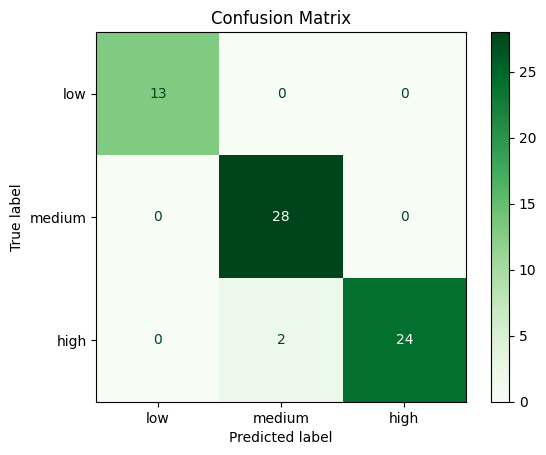

In [8]:
cm = confusion_matrix(test['Total_class'], test['Predictions_class'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.show()